# Patient similarity networks (PSN)

A.L. 2022-10-26 (SageMath 9.7 / Ubuntu 20.04, MacOS Ventura); 2022-11-14; 2023-08-21 (Ubuntu 2022.04, Sage 10.1)

See also: https://sagemanifolds.obspm.fr/install_ubuntu.html

Check sage installation and start a Jupyter notebook with the SageMath 9.6 kernel:

```
sage -c 'print(version())
sage -notebook
```

```
SageMath version 9.7, Release Date: 2022-09-19
```

Installing R-packages:
```
sage -R

> install.packages("lme4")
```

Installing Python packages (in the sage kernel):
```
> sage --pip install pandas
> sage --pip install seaborn
> sage --pip install networkx
> sage --pip install igraph
> # sage --pip install pycairo
> # sage --pip install cairocffi
> # sage --pip install leidenalg
> sage --pip install jupyterlab
> sage --pip install altair vega_datasets      # https://altair-viz.github.io/index.html
> sage --pip install pygraphviz
```

### cedas-norbis-vega-altair.ipynb

Hello everyone! I'm Cagatay Turkay. I will be leading the Visual Data Science part of the summer school next week. Hope you are all feeling ready for the summer school. We are still a few days away from the Visual Data Science sessions on Thursday and Friday but I wanted to say hi to all There are a few small preparatory steps that I would like you to take ahead of Thursday. If you can go through the following at some point and come to the hands-on sessions with a programming setup that is ready to go, that would be excellent. Here are these four steps/packages that would be great to have a look at: Python & Anaconda: Make sure that there is a recent/latest version of Python + Jupyter Lab environment running. Any envrionment running Python 3.7 and above will suffice.

I recommend installing the latest version of Anaconda if you haven't already:

https://www.anaconda.com/download

And any issues, you can refer to the documentation:

https://docs.anaconda.com/free/anaconda/install/index.html

Data Analysis Packages: If you install your Python environment using Anaconda, you will have many of the packages we will be needing. The following packages are key in the exercises and will be used frequently:

pandas - https://pandas.pydata.org/ scikit-learn - https://scikit-learn.org/stable/

but they come within the Anaconda installation pre-installed, so you won't need to worry.

Altair: One package that doesn't come with Anaconda is the visualisation library called Altair:

https://altair-viz.github.io/index.html

You will need to install that within your Python setup. Check the installation guidance here, very easy if you are using Anaconda:

https://altair-viz.github.io/getting_started/installation.html

Make sure that you don't have any active Jupyter kernels before installation. Once installed, try one of the examples by opening up a notebook in JupyterLab:

https://altair-viz.github.io/gallery/simple_bar_chart.html

If you can see a bar chart, you are good to go!

Panel: for some of the interactive exercises, we will experiment with a Python-based dashboarding platform called Panel. You will need to install Panel as well. Again, easiest way to do this is using an Anaconda platform. Installation details here:

https://panel.holoviz.org/getting_started/installation.html You can check if you have Panel working by going through this mini guideline: https://panel.holoviz.org/getting_started/build_app.html

## Introduction to graphs in Sage

See also: https://doc.sagemath.org/html/en/reference/graphs/index.html

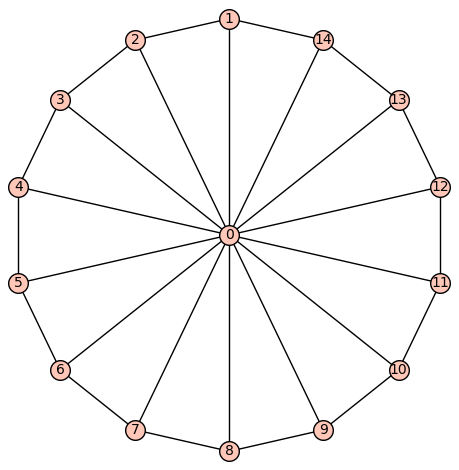

In [2]:
G = graphs.WheelGraph(15)
P = G.plot()
P.show()

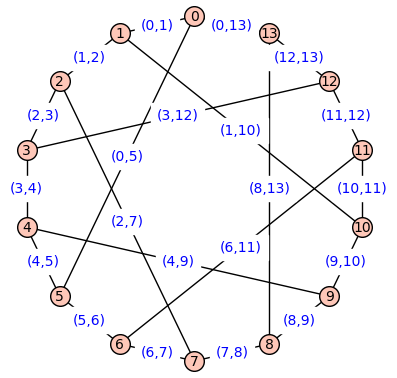

In [3]:
G = graphs.HeawoodGraph().copy(sparse=True)
for u,v,l in G.edges():
    G.set_edge_label(u,v,f"({str(u)},{str(v)})")   
G.graphplot(edge_labels=True).show()

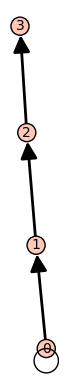

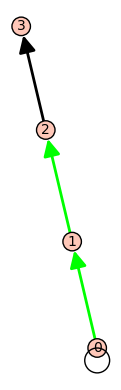

In [4]:
D = DiGraph({0:[0,1], 1:[2], 2:[3]}, loops=True)
D.show()
D.show(edge_colors={(0,1,0):[(0,1,None),(1,2,None)],(0,0,0):[(2,3,None)]})

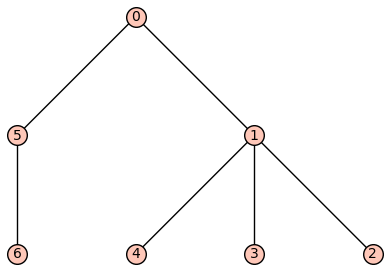

In [5]:
T = list(graphs.trees(7))
t = T[3]
t.graphplot(layout='tree').show()

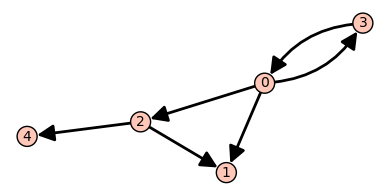

In [6]:
D = DiGraph({0:[1,2,3], 2:[1,4], 3:[0]})
D.graphplot().show()

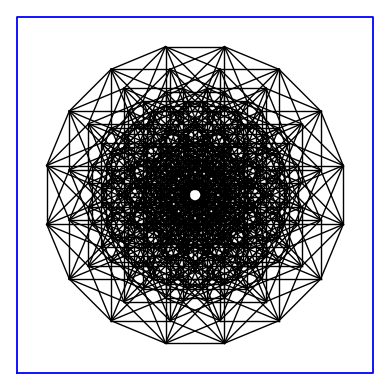

In [7]:
C = graphs.CubeGraph(8)
P = C.graphplot(vertex_labels=False, vertex_size=0, graph_border=True)
P.show()

## Adjacency matrix: 
In an adjacency matrix, each column and each row represent a
vertex. If a 1 shows up in row $i$, column $j$, there is an edge $(i,j)$.

In [8]:
M = Matrix([(0,1,0,0,1,1,0,0,0,0),(1,0,1,0,0,0,1,0,0,0), \
(0,1,0,1,0,0,0,1,0,0), (0,0,1,0,1,0,0,0,1,0),(1,0,0,1,0,0,0,0,0,1), \
(1,0,0,0,0,0,0,1,1,0), (0,1,0,0,0,0,0,0,1,1),(0,0,1,0,0,1,0,0,0,1), \
(0,0,0,1,0,1,1,0,0,0), (0,0,0,0,1,0,1,1,0,0)])

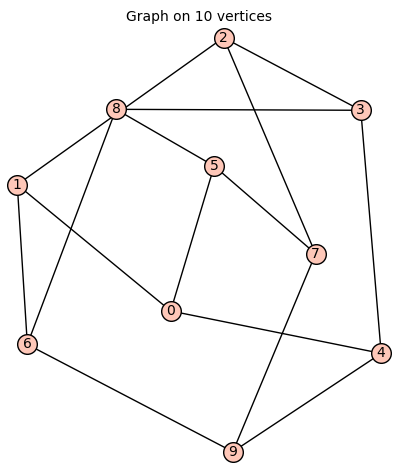

In [9]:
G = Graph(M); G

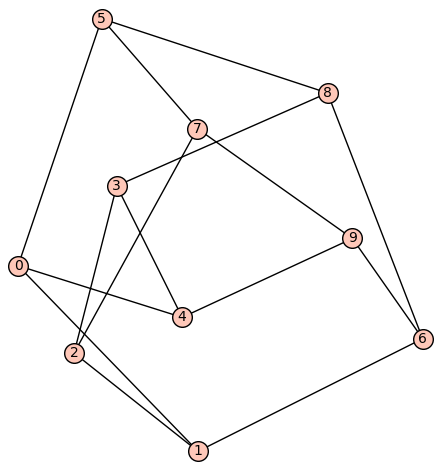

In [10]:
# Alternatively,

G.plot().show()    # or G.show()

## A list of edges:

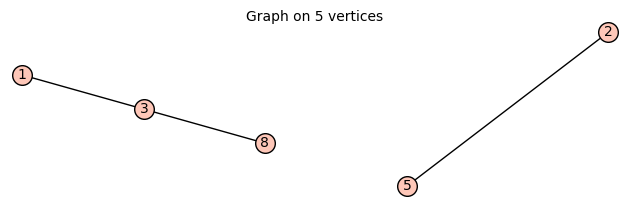

In [11]:
g = Graph([(1,3),(3,8),(5,2)])
g

## An `iGraph` graph

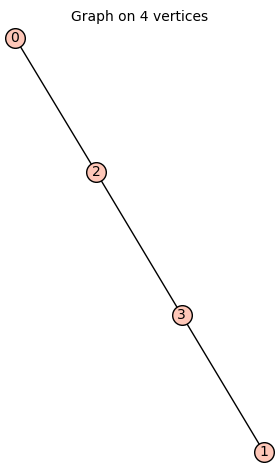

In [12]:
import igraph 

g = Graph(igraph.Graph([(1,3),(3,2),(0,2)]))
g

## A Petersen graph and node degree

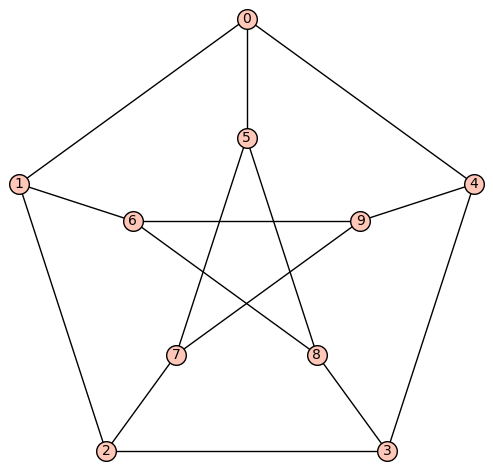

In [13]:
G = graphs.PetersenGraph()
G.plot().show() 

In [14]:
G.degree_histogram()

[0, 0, 0, 10]

In [15]:
G.adjacency_matrix()

[0 1 0 0 1 1 0 0 0 0]
[1 0 1 0 0 0 1 0 0 0]
[0 1 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 1 0]
[1 0 0 1 0 0 0 0 0 1]
[1 0 0 0 0 0 0 1 1 0]
[0 1 0 0 0 0 0 0 1 1]
[0 0 1 0 0 1 0 0 0 1]
[0 0 0 1 0 1 1 0 0 0]
[0 0 0 0 1 0 1 1 0 0]

In [16]:
G.vertices()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Plotting degree distribution

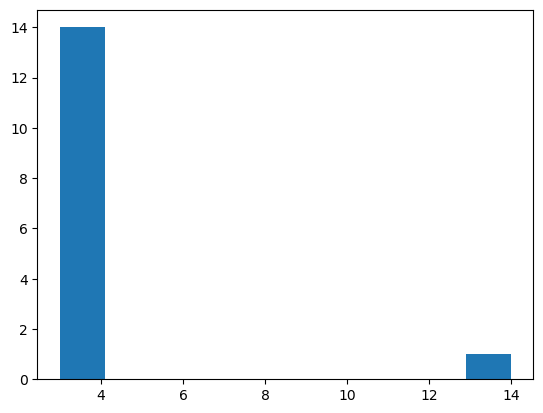

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.vertices()]  # G.nodes()]
    #plt.hist(degrees)
    # or, plot pre-computed bins and counts using hist() by treating each bin 
    # as a single point with a weight equal to its count:
    counts, bins = np.histogram(degrees)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()

# plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))
plot_degree_dist(graphs.WheelGraph(15))

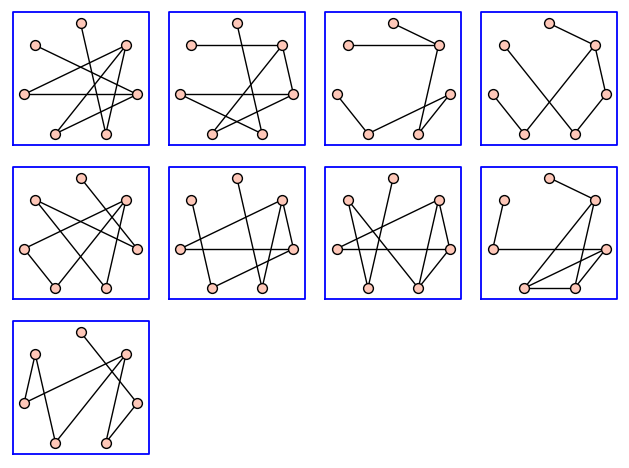

In [18]:
G = GraphQuery(display_cols=['graph6'], num_vertices=7, diameter=5)
L = G.get_graphs_list()
graphs_list.show_graphs(L)

There is a database available for searching for graphs that satisfy a certain set of parameters, including number of vertices and edges, density, maximum and minimum degree, diameter, radius, and connectivity. To see a list of all search parameter keywords broken down by their designated table names, type

In [19]:
graph_db_info()

{'graph_data': ['complement_graph6',
  'eulerian',
  'graph6',
  'lovasz_number',
  'num_cycles',
  'num_edges',
  'num_hamiltonian_cycles',
  'num_vertices',
  'perfect',
  'planar'],
 'aut_grp': ['aut_grp_size',
  'num_orbits',
  'num_fixed_points',
  'vertex_transitive',
  'edge_transitive'],
 'degrees': ['degree_sequence',
  'min_degree',
  'max_degree',
  'average_degree',
  'degrees_sd',
  'regular'],
 'misc': ['vertex_connectivity',
  'edge_connectivity',
  'num_components',
  'girth',
  'radius',
  'diameter',
  'clique_number',
  'independence_number',
  'num_cut_vertices',
  'min_vertex_cover_size',
  'num_spanning_trees',
  'induced_subgraphs'],
 'spectrum': ['spectrum',
  'min_eigenvalue',
  'max_eigenvalue',
  'eigenvalues_sd',
  'energy']}

## Visualization of graphs

To see a graph $G$  you are working with, there are three main options. You can view the graph in two dimensions via matplotlib with `show()`.

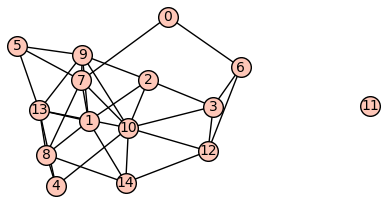

In [20]:
G = graphs.RandomGNP(15,.3)
G.show()

And you can view it in three dimensions via [jmol](https://jmol.sourceforge.net) with `show3d()`.

In [21]:
G.show3d()

Graphics3d Object

Or it can be rendered with $\LaTeX$. This requires the right additions to a standard LaTeX installation. Then standard Sage commands, such as view(G) will display the graph, or latex(G) will produce a string suitable for inclusion in a 
 document. More details on this are at the [sage.graphs.graph_latex](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_latex.html#module-sage.graphs.graph_latex) module.

In [22]:
from sage.graphs.graph_latex import check_tkz_graph
check_tkz_graph()  # random - depends on TeX installation
latex(G)

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

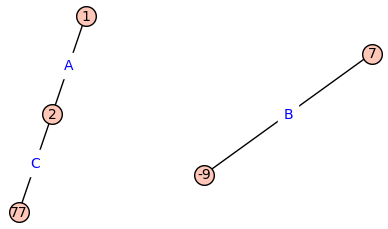

In [23]:
g = Graph([(1,2,"A"),(7,-9,"B"),(77,2, "C")])
g.graphplot(edge_labels=True).show()

In [24]:
g = igraph.Graph([(0,1),(0,2)], vertex_attrs={'name':['a','b','c']})
Graph(g).vertices(sort=True) 

['a', 'b', 'c']

In [25]:
g.degree("a")

2

In [26]:
color_dict = {"a": "red", "b": "green", "c": "blue"}
vertex_color=[color_dict[name] for name in g.vs["name"]]
vertex_color

['red', 'green', 'blue']

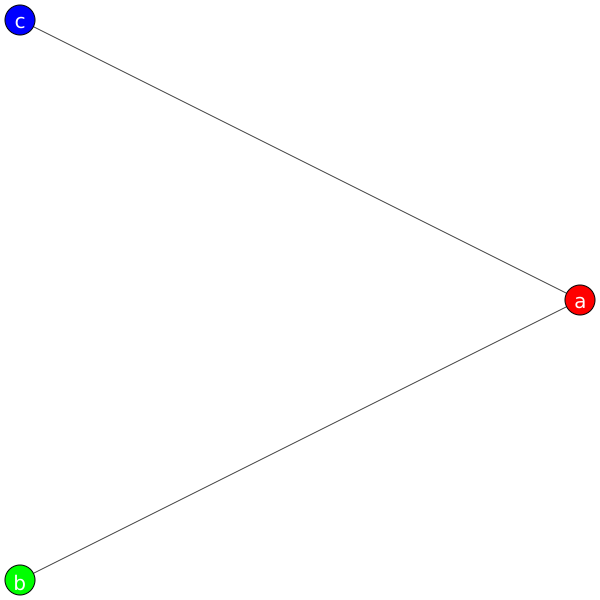

In [27]:
layout = g.layout_circle() # g.layout_random() # g.layout("kk")
igraph.plot(g, 
            layout=layout, 
            vertex_size = 30,
            vertex_color=vertex_color, 
            vertex_label=g.vs["name"], 
            vertex_label_color="white",
            vertex_label_size = 20)

In [28]:
g.vs.attribute_names()

['name']

In [29]:
g.vs["name"]

['a', 'b', 'c']

## Graphs in Python using NetworkX

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [31]:
# An adjacency matrix

A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
# Make a NetworkX graph from A

G = nx.from_numpy_array(A)

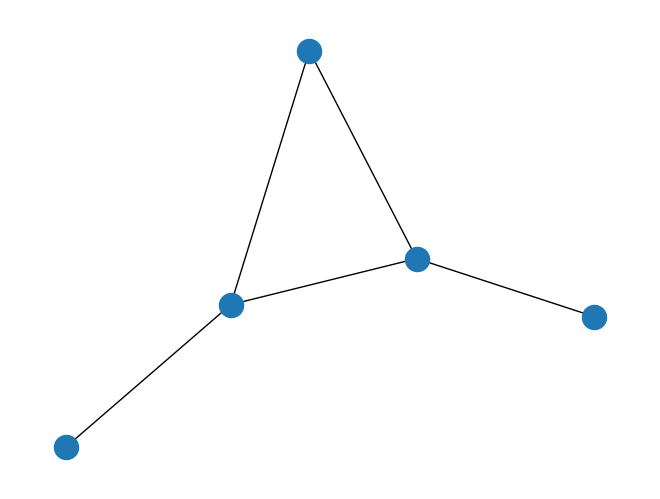

In [33]:
# DRaw the graph

nx.draw(G)

### Directedness and weightedness

We have two questions of network properties to consider when making a model:

- is the edges directed or undirected?
- are the edges (their values, or weights) continuous or binary?
For instance, the WWW is directed, but a social acquaintance does not follow a particular direction. We can use the `nx.DiGraph` class to force it to create a directed graph.

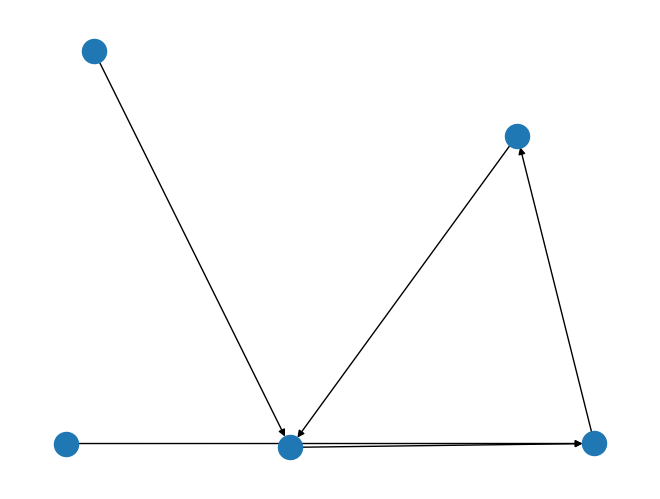

In [34]:
G_dir = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.draw(G_dir)

And we can just as easily transform it back into a numpy array:

In [35]:
M = nx.to_numpy_array(G_dir)
M

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [36]:
# being the same as expected:
M == A 

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### A more elaborate example:

In [37]:
A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A
G = nx.from_numpy_array(A)
node_labels = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

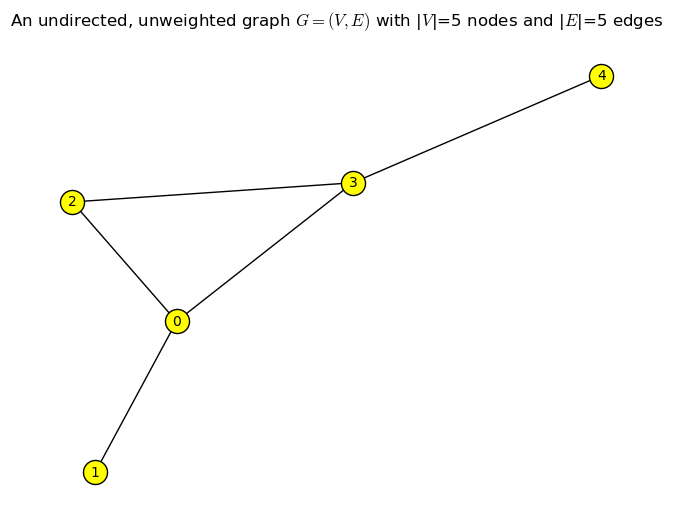

In [38]:
pos = nx.layout.spring_layout(G) # , seed=1)

nx.draw(G, pos=pos, labels=node_labels, node_color='yellow', font_size=10, font_color='k')
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")  # Yellow circular nodes with black bundary
plt.title('An undirected, unweighted graph $G=(V,E)$ with |$V$|=5 nodes and |$E$|=5 edges')
plt.show()

### Degree centrality
The degree centrality for a node $v \in V$  is the fraction of nodes it is connected to.

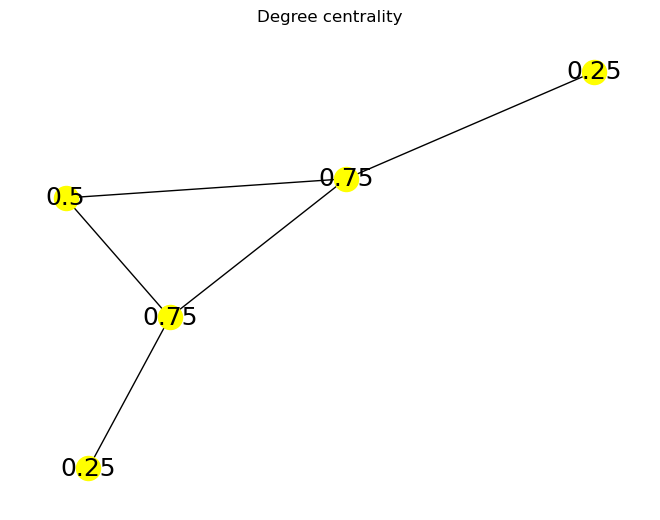

In [39]:
deg = nx.centrality.degree_centrality(G)
nx.draw(G, pos=pos, labels=deg, node_color='yellow', font_size=18, font_color='k')
plt.title('Degree centrality')
plt.show()

### Clustering coefficient
For unweighted graphs, the clustering of a node $u \in V$  is the fraction of possible triangles through that node that exist,
$$
c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
$$

where $T(u)$  is the number of triangles through node $u$  and $deg(u)$ is the degree of $u$.

dict_values([0.3333333333333333, 0, 1.0, 0.3333333333333333, 0])


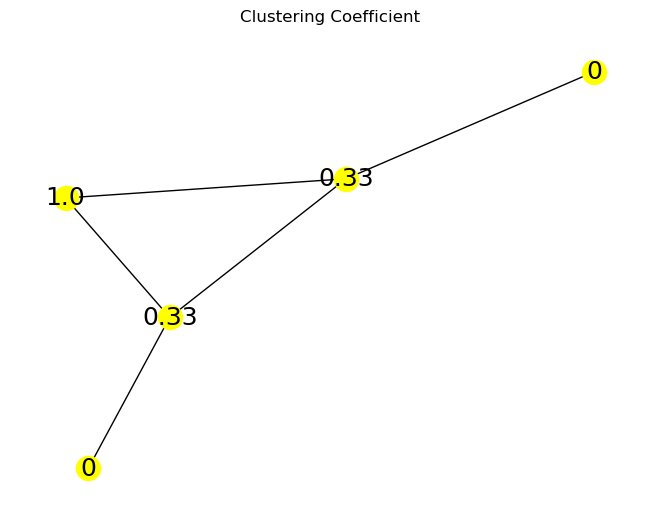

In [40]:
cc = nx.clustering(G)
print(cc.values())
for key, value in cc.items():
    newvalue = np.round(value, 2)
    cc[key] = newvalue
nx.draw(G, pos=pos, labels=cc, node_color='yellow', font_size=18, font_color='k')
plt.title('Clustering Coefficient')
plt.show()

## We will now be using medical data from the Pima indians diabetes database

Load, explore and prepare the data Let's repeat the procedure on another benchmark data set: Diabetes Data Set. You'll find a description of the data set together with a link to the data here:

- https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here:
- https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

In [41]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

### We will use Pandas to inspect and process text data:

In [42]:
# Needed for MacOS
# cf. <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED]
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [43]:
diabetes = pd.read_csv(url)

In [44]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
diabetes.shape

(768, 9)

In [46]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Here's a description of each feature (from Kaggle):

- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

We can visualize the relation between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

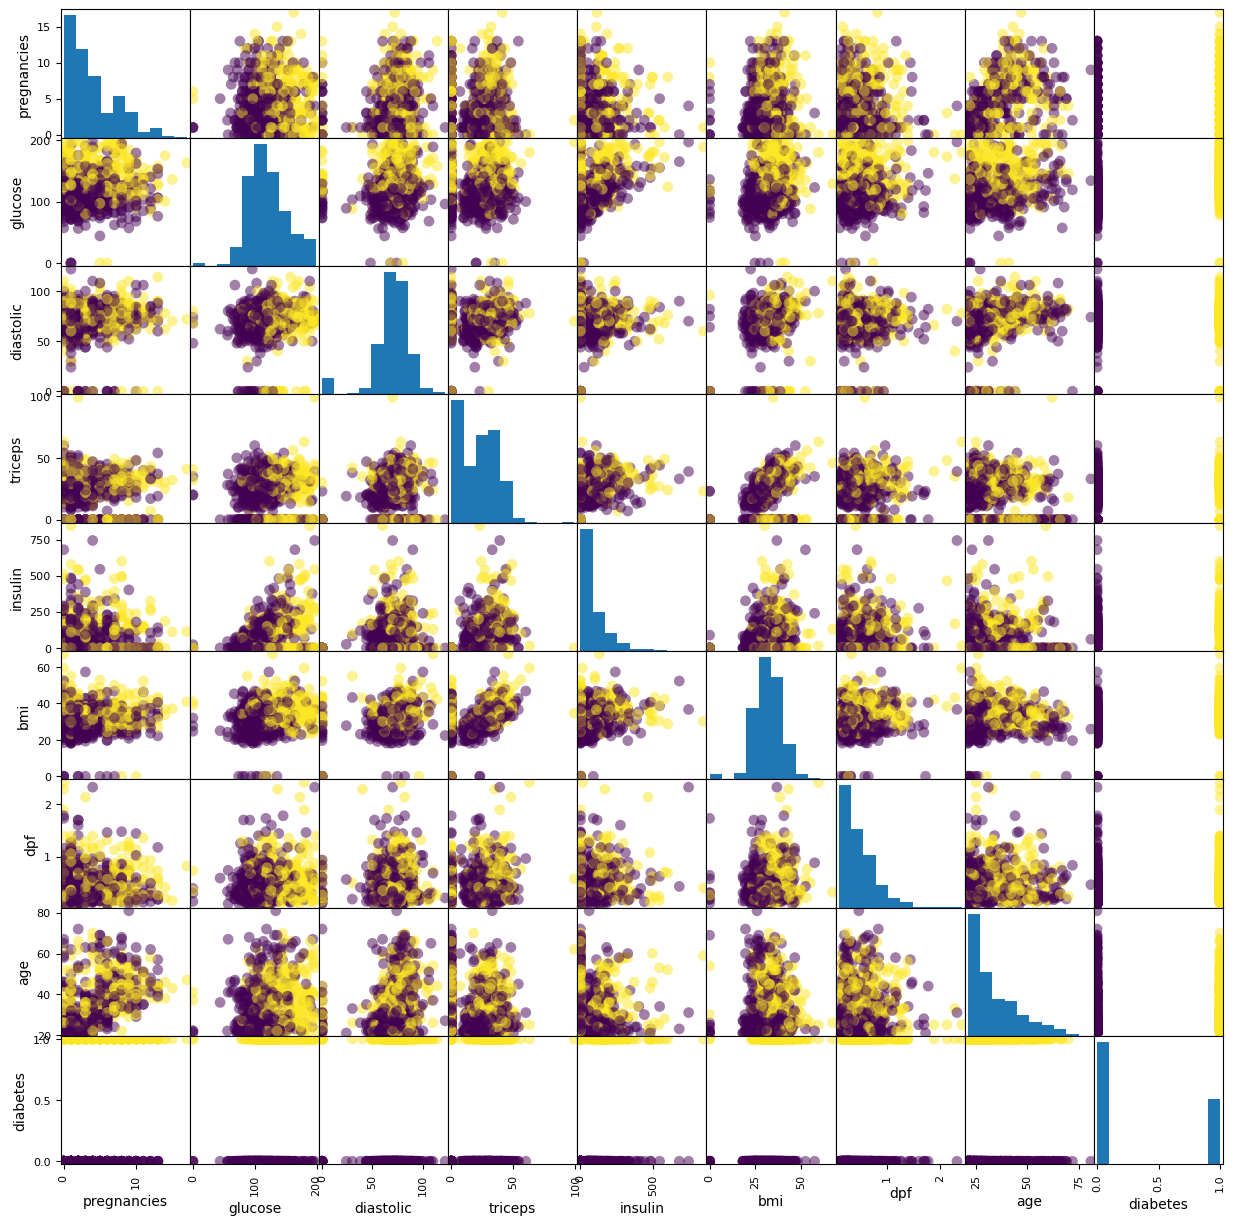

In [48]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

In [49]:
print(list(diabetes.columns))

['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes']


## Altair

In [50]:
# Simple Scatter Plot with Tooltips
# https://altair-viz.github.io/gallery/scatter_tooltips.html

# import altair with an abbreviated alias
import altair as alt

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()


/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)
/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file

alt.Chart(...)

In [51]:
# Simple Heatmap with Altair

import altair as alt
import numpy as np
import pandas as pd

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)
/home/arvid/GitHub/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file

alt.Chart(...)

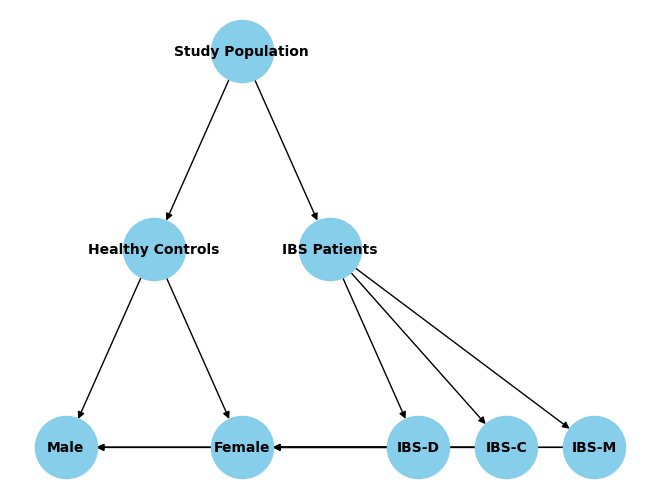

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Nodes for the main categories
G.add_node('Study Population')
G.add_node('Healthy Controls')
G.add_node('IBS Patients')
G.add_node('Male')
G.add_node('Female')
G.add_node('IBS-D')
G.add_node('IBS-C')
G.add_node('IBS-M')

# Edges connecting the nodes
G.add_edge('Study Population', 'Healthy Controls')
G.add_edge('Study Population', 'IBS Patients')
G.add_edge('Healthy Controls', 'Male')
G.add_edge('Healthy Controls', 'Female')
G.add_edge('IBS Patients', 'IBS-D')
G.add_edge('IBS Patients', 'IBS-C')
G.add_edge('IBS Patients', 'IBS-M')
G.add_edge('IBS-D', 'Male')
G.add_edge('IBS-D', 'Female')
G.add_edge('IBS-C', 'Male')
G.add_edge('IBS-C', 'Female')
G.add_edge('IBS-M', 'Male')
G.add_edge('IBS-M', 'Female')

# Positioning the nodes
pos = {
    'Study Population': (0, 0),
    'Healthy Controls': (-1, -1),
    'IBS Patients': (1, -1),
    'Male': (-2, -2),
    'Female': (0, -2),
    'IBS-D': (2, -2),
    'IBS-C': (3, -2),
    'IBS-M': (4, -2),
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.show()

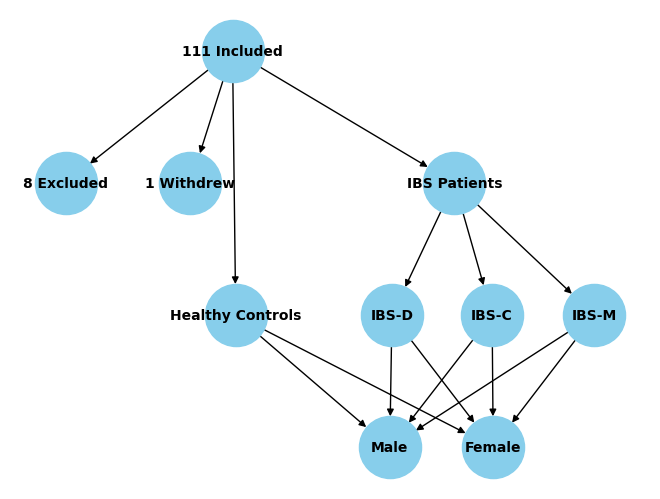

In [1]:
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Nodes for the main categories
G.add_node('111 Included', shape='box')
G.add_node('8 Excluded', shape='box')
G.add_node('1 Withdrew', shape='box')
G.add_node('Healthy Controls', shape='ellipse')
G.add_node('IBS Patients', shape='ellipse')
G.add_node('Male', shape='ellipse')
G.add_node('Female', shape='ellipse')
G.add_node('IBS-D', shape='ellipse')
G.add_node('IBS-C', shape='ellipse')
G.add_node('IBS-M', shape='ellipse')

# Edges connecting the nodes
G.add_edge('111 Included', '8 Excluded')
G.add_edge('111 Included', '1 Withdrew')
G.add_edge('111 Included', 'Healthy Controls')
G.add_edge('111 Included', 'IBS Patients')
G.add_edge('Healthy Controls', 'Male')
G.add_edge('Healthy Controls', 'Female')
G.add_edge('IBS Patients', 'IBS-D')
G.add_edge('IBS Patients', 'IBS-C')
G.add_edge('IBS Patients', 'IBS-M')
G.add_edge('IBS-D', 'Male')
G.add_edge('IBS-D', 'Female')
G.add_edge('IBS-C', 'Male')
G.add_edge('IBS-C', 'Female')
G.add_edge('IBS-M', 'Male')
G.add_edge('IBS-M', 'Female')

# Create a layout for the nodes
A = nx.nx_agraph.to_agraph(G)
A.layout(prog='dot')

# Draw the graph
nx.draw(G, pos=graphviz_layout(G, prog='dot'), with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.show()

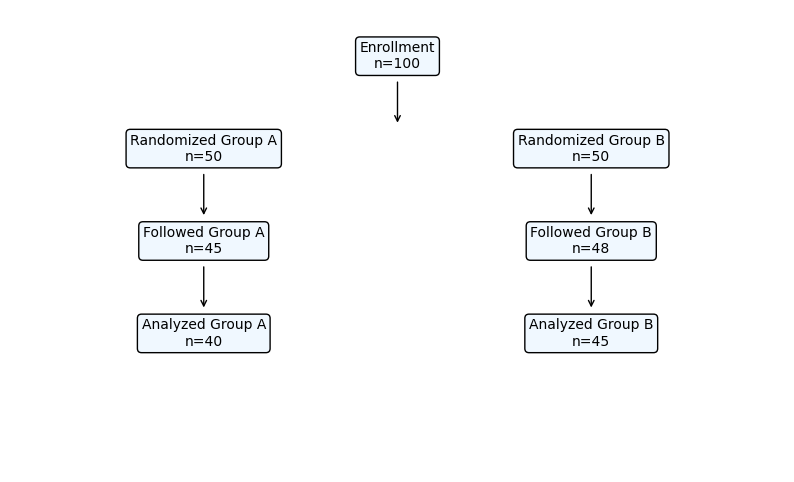

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the data
enrollment = 100
randomized_A = 50
randomized_B = 50
followed_A = 45
followed_B = 48
analyzed_A = 40
analyzed_B = 45

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the boxes
ax.text(0.5, 0.9, f'Enrollment\nn={enrollment}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))
ax.text(0.25, 0.7, f'Randomized Group A\nn={randomized_A}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))
ax.text(0.75, 0.7, f'Randomized Group B\nn={randomized_B}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))
ax.text(0.25, 0.5, f'Followed Group A\nn={followed_A}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))
ax.text(0.75, 0.5, f'Followed Group B\nn={followed_B}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))
ax.text(0.25, 0.3, f'Analyzed Group A\nn={analyzed_A}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))
ax.text(0.75, 0.3, f'Analyzed Group B\nn={analyzed_B}', ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='black', facecolor='aliceblue'))

# Draw the arrows
arrowprops = dict(facecolor='black', edgecolor='black', arrowstyle='->')
ax.annotate('', xy=(0.5, 0.75), xytext=(0.5, 0.85), arrowprops=arrowprops)
ax.annotate('', xy=(0.25, 0.55), xytext=(0.25, 0.65), arrowprops=arrowprops)
ax.annotate('', xy=(0.75, 0.55), xytext=(0.75, 0.65), arrowprops=arrowprops)
ax.annotate('', xy=(0.25, 0.35), xytext=(0.25, 0.45), arrowprops=arrowprops)
ax.annotate('', xy=(0.75, 0.35), xytext=(0.75, 0.45), arrowprops=arrowprops)

# Remove the axes
ax.axis('off')

# Show the plot
plt.show()